# Data Proprecessing + Analysis
---
텍스트 데이터들을 전처리 하고 필요한 분석들을 함께 진행합니다.

- 배틀넷
   - 시간 데이터 전처리
   - 공지 글 삭제
   - 중복 데이터 전처리
   - 헤비유저 파악
   
  
- 인벤
   - 시간 데이터 전처리
   - 공지 글 삭제
   - contents컬럼의 NaN 제거
   - 헤비유저 파악
   
   
- 배틀넷+인벤 불용어 전처리

## 1. 라이브러리 로딩

In [1]:
## 라이브러리 로딩

import pandas as pd # 판다스 
import numpy as np # 넘파이
import glob # 파일 여러개 불러올 때
import time, datetime
from datetime import datetime

import re # 정규표현식
import csv # 파일로 저장하기 위한 툴

import ast # Abstrac Syntex Tree - 스트링 처리된 리스트를 리스트로 다시 리턴할때

In [68]:
from tqdm import tqdm, trange
from tqdm import tqdm_notebook
from time import sleep

## 2. 데이터 올리기

### - 인벤 데이터 올리기

In [2]:
# Inven Data 

df1 = pd.read_csv("data/invenData_1~10000.csv", encoding = 'utf8', header=None, engine='python')
df2 = pd.read_csv("data/invenData_10001~50000.csv", encoding='utf8', header=None, engine='python')
df3 = pd.read_csv("data/invenData_50001~70000.csv", encoding='utf8', header=None, engine='python')
df4 = pd.read_csv("data/invenData_70001~85834.csv", encoding='utf8', header=None, engine='python')
df5 = pd.read_csv("data/invenData_85835~100000.csv", encoding='utf8', header=None, engine='python')
df6 = pd.read_csv("data/invenData_100001~120000.csv", encoding='utf8', header=None, engine='python')
df7 = pd.read_csv("data/invenData_120001~140000.csv", encoding='utf8', header=None, engine='python')
df8 = pd.read_csv("data/invenData_140001~152823.csv", encoding='utf8', header=None, engine='python')
df9 = pd.read_csv("data/invenData_152824~160100.csv", encoding='utf8', header=None, engine='python')

In [3]:
# 인벤 데이터 한꺼번에 합침
df_inven = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [4]:
# 컬럼명 붙이기
df_inven.columns = ['link_id', 'timestamp', 'title', 'contents']

In [6]:
# NaN을 아예 길이없는 스트링으로 전환
df_inven['contents'].fillna("", inplace=True)

In [7]:
## 내용이 너무 짧다. 제목과 내용을 합친다.

# 시작 컬럼 포지션을 잡기
source_col_loc = df_inven.columns.get_loc('title') 

# 컬럼 기준으로 제목 + 내용 합치기
df_inven['contents_all'] = df_inven.iloc[:,source_col_loc:source_col_loc+2].apply(lambda x: ",".join(x.astype(str)), axis=1)

In [8]:
# 인덱스를 리셋시켜서 14만번대가 나오게 하도록 한다.
df_inven.reset_index(inplace=True)

### - 배틀넷 데이터 올리기

In [9]:
# 파일 읽기
df_battle = pd.read_csv("data/battlenetData.csv", encoding='utf8', header=None, engine='python')

In [10]:
df_battle.columns = ['link_id', 'user_id', 'timestamp', 'title', 'contents']

## 3. 데이터 전처리 - tidydata 만들기

### - 배틀넷 
---
### 시간 데이터 전처리

In [12]:
## index 1017번째 timestamp가 비어있었음. 
df_battle = df_battle[df_battle['timestamp'].notnull()]

In [13]:
# 글을 드랍하였기 떄문에 인덱스 리셋

df_battle.reset_index(inplace=True)

In [14]:
# 새로운 데이트타임 형식 만들기 - 스트링으로 들어와서 새로 만들어야 합니다.

new_dates = []

for i in range(5699):
    
    years = int(df_battle['timestamp'][i][0:4])
    months = int(df_battle['timestamp'][i][5:7])
    days = int(df_battle['timestamp'][i][8:10])
    hours = int(df_battle['timestamp'][i][11:13]) 
    minutes = int(df_battle['timestamp'][i][15:17])
    
    dates = datetime(years, months, days, hours, minutes)
    
    new_dates.append(dates)

In [15]:
df_battle["new_datetime"] = new_dates

In [16]:
df_battle.drop('timestamp',axis=1, inplace=True)

In [17]:
df_battle.head()

,index,link_id,user_id,title,contents,new_datetime
0,0,4564557252,비전력이부조카당,"아바투르 유저인데, 하나 건의합니다.","[아바투르 유저인데, 하나 건의합니다.새로 생긴 하나무라 맵...뭐 이것도 맵 자체...",2017-05-06 05:21:00
1,1,4567016696,네이팜데쓰,"매칭 시스템, 아무리 생각해도 문제가 많습니다",[매칭좀 제대로 해주세요.9연패가 말이 되는 처사입니까 며칠전에 16연승했다고 벌을...,2018-09-08 16:53:00
2,2,4567016695,souse,ㅈ같은 매칭좀 어캐좀 해봐요,[왜 내가 잘해도 ㅈ같이못하는 새키들때문에 게임을 져야하죠? 왜 심지어 못하는새키랑...,2018-09-08 16:22:00
3,3,4567026707,Best,아나 스킨관련..,[신 스킨 살무사 아나 수면총 색 고정말고. 스킨 색 대로 해주셧으면 좋겠습니다....,2018-09-08 15:13:00
4,4,4567036673,세월,5인팟 + 승률50%집착매칭 + 밸런스 파괴 = 빠대무간지옥,[승률 50% 만든다고 조합 !@내놓고5인팟은 여전히 솔팟 사이에서 개판치고다니고너...,2018-09-07 13:58:00


### - 그 외 중복 데이터 처리하기

In [18]:
# 블리자드 사에서 올린 공지는 제외

df_battle = df_battle[df_battle.user_id != "Blizzard Entertainment"]

In [19]:
# 글 완전 중복은 일단 제거합니다

df_battle['contents'].drop_duplicates(keep='first', inplace = True)

In [20]:
# 헤비유저 파악 혹은 글 연달아 올린 사람 파악하기

user_list = df_battle['user_id'].unique()

for uid in user_list[:15]:
    dfuid = df_battle[df_battle['user_id']==uid]    

# 전처리 되도록이면 판다스로 하기. 유저 아이디 중복을 찾은다음에. 시간 차이가 몇 안나는 것들은 빼기(몇 분 이상 차이나면 없애는 방향으로)

In [21]:
# 헤비 유저(빅마우스)들 (상위 10명)
print(user_list[0:10])

['비전력이부조카당' '네이팜데쓰' 'souse' 'Best' '세월' 'Ditto' 'JELAWAT' '요우몽' '파워디지몬'
 '인생이지겨워']


In [23]:
## 글 많이 쓴사람 : 요XX
len(df_battle[df_battle['user_id']=='요우몽'])

177

In [27]:
## 위에서 글을 많이 쓴 사람들 중에서 시간차가 거의 나지 않고 + 거의 같은 내용의 글 인덱스를 찾습니다.

print(df_battle[df_battle['link_id']==4566866705])
print(df_battle[df_battle['link_id']==4566857028])

     index     link_id user_id              title  \
109    109  4566866705     요우몽  화메 궁쿨 책정부터 잘못되어있음   

                                              contents        new_datetime  
109  [성스러운징벌이 100초 붉은가호가 1분인데 @%*!!# 성능 따져봐도 당연 붉은가... 2018-08-30 04:10:00  
     index     link_id user_id         title  \
189    189  4566857028   파워디지몬  HOTS 영웅리그 건의   

                                              contents        new_datetime  
189  [HOTS는 이전부터 영웅리그에 대한 문제가 많았습니다.크게 정리하자면 3가지가 있... 2018-08-21 06:01:00  


In [28]:
# 위에서 나온 결과를 기준으로 판단하여 중복 행 몇개를 삭제한다. - 뒷 인덱스를 삭제합니다. 새로 쓴 글이 의사를 더 잘 반영한다고 기준을 둠

df_battle.drop([189],inplace=True)
df_battle.drop([109],inplace=True)

In [29]:
df_battle.reset_index(inplace=True)

In [31]:
## 내용이 너무 짧다. 제목과 내용을 합칩니다.

# 시작 컬럼 포지션을 잡기
source_col_loc = df_battle.columns.get_loc('title') 

# 컬럼 기준으로 제목 + 내용 합치기
df_battle['contents_all'] = df_battle.iloc[:,source_col_loc:source_col_loc+2].apply(lambda x: ",".join(x.astype(str)), axis=1)

In [32]:
df_battle.head()

,level_0,index,link_id,user_id,title,contents,new_datetime,contents_all
0,0,0,4564557252,비전력이부조카당,"아바투르 유저인데, 하나 건의합니다.","[아바투르 유저인데, 하나 건의합니다.새로 생긴 하나무라 맵...뭐 이것도 맵 자체...",2017-05-06 05:21:00,"아바투르 유저인데, 하나 건의합니다.,[아바투르 유저인데, 하나 건의합니다.새로 생..."
1,1,1,4567016696,네이팜데쓰,"매칭 시스템, 아무리 생각해도 문제가 많습니다",[매칭좀 제대로 해주세요.9연패가 말이 되는 처사입니까 며칠전에 16연승했다고 벌을...,2018-09-08 16:53:00,"매칭 시스템, 아무리 생각해도 문제가 많습니다,[매칭좀 제대로 해주세요.9연패가 말..."
2,2,2,4567016695,souse,ㅈ같은 매칭좀 어캐좀 해봐요,[왜 내가 잘해도 ㅈ같이못하는 새키들때문에 게임을 져야하죠? 왜 심지어 못하는새키랑...,2018-09-08 16:22:00,"ㅈ같은 매칭좀 어캐좀 해봐요,[왜 내가 잘해도 ㅈ같이못하는 새키들때문에 게임을 져야..."
3,3,3,4567026707,Best,아나 스킨관련..,[신 스킨 살무사 아나 수면총 색 고정말고. 스킨 색 대로 해주셧으면 좋겠습니다....,2018-09-08 15:13:00,"아나 스킨관련..,[신 스킨 살무사 아나 수면총 색 고정말고. 스킨 색 대로 해..."
4,4,4,4567036673,세월,5인팟 + 승률50%집착매칭 + 밸런스 파괴 = 빠대무간지옥,[승률 50% 만든다고 조합 !@내놓고5인팟은 여전히 솔팟 사이에서 개판치고다니고너...,2018-09-07 13:58:00,"5인팟 + 승률50%집착매칭 + 밸런스 파괴 = 빠대무간지옥,[승률 50% 만든다고..."


In [33]:
# 가공이 끝나는 열들은 다 드랍합니다. (유저 아이디는 보안문제로 더이상 사용하지 않습니다.)

df_battle.drop('user_id',axis=1, inplace=True)
df_battle.drop('title',axis=1, inplace=True)
df_battle.drop('contents',axis=1, inplace=True)
df_battle.drop('level_0',axis=1, inplace=True)
df_battle.drop('index',axis=1, inplace=True)

In [34]:
# 년도와 월을 따로 만듭니다.
df_battle['Year'] = df_battle['new_datetime'].dt.year
df_battle['Month'] = df_battle['new_datetime'].dt.month

In [35]:
df_battle.head()

,link_id,new_datetime,contents_all,Year,Month
0,4564557252,2017-05-06 05:21:00,"아바투르 유저인데, 하나 건의합니다.,[아바투르 유저인데, 하나 건의합니다.새로 생...",2017,5
1,4567016696,2018-09-08 16:53:00,"매칭 시스템, 아무리 생각해도 문제가 많습니다,[매칭좀 제대로 해주세요.9연패가 말...",2018,9
2,4567016695,2018-09-08 16:22:00,"ㅈ같은 매칭좀 어캐좀 해봐요,[왜 내가 잘해도 ㅈ같이못하는 새키들때문에 게임을 져야...",2018,9
3,4567026707,2018-09-08 15:13:00,"아나 스킨관련..,[신 스킨 살무사 아나 수면총 색 고정말고. 스킨 색 대로 해...",2018,9
4,4567036673,2018-09-07 13:58:00,"5인팟 + 승률50%집착매칭 + 밸런스 파괴 = 빠대무간지옥,[승률 50% 만든다고...",2018,9


### - 인벤
---
### 시간 데이터 전처리

In [36]:
df_inven.head()

,index,link_id,timestamp,title,contents,contents_all
0,0,1214270,2018-08-30 16:06,댓글 차단 BETA가 적용됩니다.,안녕하세요. 인벤 커뮤니티팀입니다.인벤을 이용하다 보면 때로는 나와 조금 다른 의견...,"댓글 차단 BETA가 적용됩니다.,안녕하세요. 인벤 커뮤니티팀입니다.인벤을 이용하다..."
1,1,1214678,2018-09-05 11:56,9월 1주차 히어로즈 인벤 주간 이벤트 당첨자 발표,안녕하세요. 히어로즈 오브 더 스톰 인벤 커뮤니티팀입니다.히어로즈 인벤에서는 매주 ...,"9월 1주차 히어로즈 인벤 주간 이벤트 당첨자 발표,안녕하세요. 히어로즈 오브 더 ..."
2,2,1214899,2018-09-06 22:38,"[오시공] 김정민,문규리,침착맨,네클릿,옥냥이 메피스토 특별방송!",,"[오시공] 김정민,문규리,침착맨,네클릿,옥냥이 메피스토 특별방송!,"
3,3,1215180,2018-09-10 23:57,ㅋㅋㅋㅋ 장구벌레,,"ㅋㅋㅋㅋ 장구벌레,"
4,4,1215179,2018-09-10 23:52,캘타스 뭐가 더 비슷한가요?,타겜이지만 ㅎ.. 고민,"캘타스 뭐가 더 비슷한가요?,타겜이지만 ㅎ.. 고민"


In [37]:
# 새로운 데이트타임 형식 만들기

inven_new_dates = []

for i in range(len(df_inven)):
 
    inven_dates = datetime.strptime(df_inven.iloc[i,2], "%Y-%m-%d %H:%M")
    inven_new_dates.append(inven_dates)

In [38]:
# 시간 열을 추가하고 없앱니다.
df_inven["new_datetime"] = inven_new_dates
df_inven.drop('timestamp',axis=1, inplace=True)

In [42]:
# 분석에 필요없어진 열들을 다시 드랍합니다.

#df_inven.drop('title',axis=1, inplace=True)
#df_inven.drop('contents',axis=1, inplace=True)
df_inven.drop('index',axis=1, inplace=True)

In [43]:
df_inven.tail()

,link_id,contents_all,new_datetime
147578,1030725,"와 미친 오늘 진짜 치열하다 ㅋㅋㅋ,5,6 위 매치 진짜 미친듯이 치열하네의외의 꿀...",2017-09-02 19:19:00
147579,1030724,"뭐 안늙어죽으면 불멸자는 맞지만,불멸자들중에서도 조건부로맞아죽어도 살아날수있으니 개...",2017-09-02 19:18:00
147580,1030723,"히오스 n주년 이벤 해서,플레이어들이스킨 부문영웅 부문 창작해서 각 서버별로 상금걸...",2017-09-02 19:16:00
147581,1030722,"Cc에 강한 탱커 생겻으면,Cc 맞으면 체력회복",2017-09-02 19:13:00
147582,1030721,"이겜 영리하다보면 어느구간부터가 잘하는지 의문임,체감상 그마도 몇십유저 빼고 다 고...",2017-09-02 19:13:00


### 인벤 - 그 외 중복 데이터 처리하기

In [44]:
print(df_inven[df_inven["link_id"] == 1214678],"\n","="*80,
      df_inven[df_inven["link_id"] == 1214270],"\n","="*80,
      df_inven[df_inven["link_id"] == 1213632],"\n","="*80,
      df_inven[df_inven["link_id"] == 1214199],"\n","="*80,
      df_inven[df_inven["link_id"] == 1213035],"\n","="*80,
      df_inven[df_inven["link_id"] == 1212385],"\n","="*80,
      df_inven[df_inven["link_id"] == 1211671],"\n","="*80,
      df_inven[df_inven["link_id"] == 1210740],"\n","="*80,
      df_inven[df_inven["link_id"] == 1209936],"\n","="*80,
      df_inven[df_inven["link_id"] == 1208994],"\n","="*80,
      df_inven[df_inven["link_id"] == 1208372],"\n","="*80,
      df_inven[df_inven["link_id"] == 1207739],"\n","="*80,
      df_inven[df_inven["link_id"] == 1207110],"\n","="*80)

     link_id                                       contents_all  \
1    1214678  9월 1주차 히어로즈 인벤 주간 이벤트 당첨자 발표,안녕하세요. 히어로즈 오브 더 ...   
460  1214678  9월 1주차 히어로즈 인벤 주간 이벤트 당첨자 발표,안녕하세요. 히어로즈 오브 더 ...   

           new_datetime  
1   2018-09-05 11:56:00  
460 2018-09-05 11:56:00   
 ================================================================================      link_id                                       contents_all  \
0    1214270  댓글 차단 BETA가 적용됩니다.,안녕하세요. 인벤 커뮤니티팀입니다.인벤을 이용하다...   
821  1214270  댓글 차단 BETA가 적용됩니다.,안녕하세요. 인벤 커뮤니티팀입니다.인벤을 이용하다...   

           new_datetime  
0   2018-08-30 16:06:00  
821 2018-08-30 16:06:00   
 ================================================================================       link_id                                       contents_all  \
1390  1213632  8월 3주차 히어로즈 인벤 주간 이벤트 당첨자 발표,안녕하세요. 히어로즈 오브 더 ...   

            new_datetime  
1390 2018-08-22 16:38:00   
 ================================================================================ 

1, 460 / 0 ,821 / 1390, 881, 1921, 2510, 3140, 3990, 4695, 5531, 6109, 6672, 7226  글들은 커뮤니티 팀에서 올린 것으로 삭제한다.

(운영자 아이디로 검색하여 글번호 확인하였음)

In [46]:
# 운영팀에서 올린 공지는 제외
# 아이디를 직접 긁어오지 않았으므로, 웹상에서 직접 링크 아이디를 찾아 제거합니다.

df_inven.drop([0],inplace=True)
df_inven.drop([1],inplace=True)
df_inven.drop([460],inplace=True)
df_inven.drop([821],inplace=True)
df_inven.drop([881],inplace=True)
df_inven.drop([1390],inplace=True)
df_inven.drop([1921],inplace=True)
df_inven.drop([2510],inplace=True)
df_inven.drop([3140],inplace=True)
df_inven.drop([3990],inplace=True)
df_inven.drop([4695],inplace=True)
df_inven.drop([5531],inplace=True)
df_inven.drop([6109],inplace=True)
df_inven.drop([6672],inplace=True)
df_inven.drop([7226],inplace=True)

In [47]:
df_inven.reset_index(inplace=True)

In [49]:
df_inven.drop('index',axis=1, inplace=True)

In [50]:
# inven 컬럼 다시조정

df_inven = df_inven[['link_id','new_datetime','contents_all']]

In [64]:
# 년도와 월을 따로 만듭니다.

df_inven['Year'] = df_inven['new_datetime'].dt.year
df_inven['Month'] = df_inven['new_datetime'].dt.month

In [65]:
df_inven.head()

,link_id,new_datetime,contents_all,Year,Month
0,1214899,2018-09-06 22:38:00,오시공 김정민 문규리 침착맨 네클릿 옥냥이 메피스토 특별방송,2018,9
1,1215180,2018-09-10 23:57:00,ㅋㅋㅋㅋ 장구벌레,2018,9
2,1215179,2018-09-10 23:52:00,캘타스 뭐가 더 비슷한가요 타겜이지만 ㅎ 고민,2018,9
3,1215178,2018-09-10 23:52:00,메피 방금사서 해봤는데 너무사기임 궁각만 잘재고 쓰면 못해도 더블킬은 따고들...,2018,9
4,1215177,2018-09-10 23:50:00,제발 메피는 궁이랑 보호막특 너프 좀 두개가 안되면 궁이라도 궁자체도 최상...,2018,9


## 3. 데이터 전처리 - 특수문자 전처리

In [55]:
# 정규 표현식
p_http = re.compile("(((http(s?))\:\/\/)?)([0-9a-zA-Z\-]+\.)+[a-zA-Z]{2,6}(\:[0-9]+)?(\S*)")
p_char = re.compile("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9ㅣ ]")
p_tag = re.compile("<.+>")
p_brac = re.compile("[[\]]")

In [56]:
# 정규 표현식 함수화

def patternRemover(doc):
    doc = p_http.sub(' ', doc)
    doc = p_char.sub(' ', doc)
    doc = p_tag.sub(' ', doc)
    doc = p_brac.sub(' ', doc)
    return doc

In [58]:
# 배틀넷 - 특수문자 전처리

for i in range(len(df_battle["contents_all"])):
    df_battle.iloc[i,2] = patternRemover(df_battle.iloc[i,2])

In [66]:
len(df_inven)

147568

In [70]:
# 인벤 - 특수문자 전처리

%%time

total = tqdm_notebook(range(147568))

for i in total:
    df_inven.iloc[i,2] = patternRemover(df_inven.iloc[i,2])

CPU times: user 36min 53s, sys: 1min 28s, total: 38min 22s
Wall time: 39min 26s


In [73]:
df_inven.iloc[140000,2]

## 초성 나왔음 초성도 제거해야해..

'그래서 이스프레이는 언제나오죠 나오면 바로삼 ㄹㅇ'

### 데이터 합치기

In [75]:
df_all = pd.concat([df_battle, df_inven])

In [77]:
df_all.reset_index(inplace=True)

In [81]:
df_all.drop('index',axis=1, inplace=True)

In [163]:
df_all.to_csv("predata.csv", encoding='utf-8')

In [160]:
df_all.drop('tokens_contents', axis=1, inplace=True)

In [162]:
df_all.tail()

,link_id,new_datetime,contents_all,Year,Month
153203,1030725,2017-09-02 19:19:00,와 미친 오늘 진짜 치열하다 ㅋㅋㅋ 5 6 위 매치 진짜 미친듯이 치열하네의외의 꿀...,2017,9
153204,1030724,2017-09-02 19:18:00,뭐 안늙어죽으면 불멸자는 맞지만 불멸자들중에서도 조건부로맞아죽어도 살아날수있으니 개...,2017,9
153205,1030723,2017-09-02 19:16:00,히오스 n주년 이벤 해서 플레이어들이스킨 부문영웅 부문 창작해서 각 서버별로 상금걸...,2017,9
153206,1030722,2017-09-02 19:13:00,Cc에 강한 탱커 생겻으면 Cc 맞으면 체력회복,2017,9
153207,1030721,2017-09-02 19:13:00,이겜 영리하다보면 어느구간부터가 잘하는지 의문임 체감상 그마도 몇십유저 빼고 다 고...,2017,9


## 4. 모델링 하기
---
### 모델 새로 라이브러리 로딩하기

In [84]:
# 토픽 모델링 관련 라이브러리 로딩
import gensim 
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore

# 시각화 라이브러리
from pprint import pprint
import pyLDAvis
from pyLDAvis import gensim

In [85]:
# 토크나이징 라이브러리
import MeCab
m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ko-dic')
from konlpy.tag import Mecab
mecab = Mecab()

In [86]:
%%time

tokens_all = []

for i in list(df_all["contents_all"]):
    k = mecab.nouns(i)
    tokens = []    
    for j in range(len(k)):
        if len(k[j]) > 1:
            tokens.append(k[j])
        else:
            continue
    tokens_all.append(tokens)
    
print(tokens_all[:10])

[['아바투르', '유저', '하나', '아바투르', '유저', '하나', '하나무라', '이것', '자체', '그게', '목적', '아바투르', '화물', '민폐', '대전', '일반', '등급', '고르지', '아바투르', '제한', '해결', '초갈', '상황', '발생', '이건', '아바투르'], ['매칭', '시스템', '생각', '문제', '매칭', '연패', '처사', '며칠', '연승', '건가요', '팀원', '적군', '플레이어', '매칭', '팀원', '적과', '히어로즈', '오브', '스톰', '캐리', '작용', '게임', '플레이어', '경험', '공유', '때문', '혼자', '성장', '캐리', '개념', '혼자', '딴짓', '팀원', '영향', '이야기', '초보자', '팀원', '게임', '게임', '레이팅', '유저', '공평', '처사', '플레이', '팀원', '때문', '연속', '패배', '실망감', '우리', '생각', '매칭', '승부', '승패', '허탈', '승부', '게임', '승부', '조합', '승패', '결정', '게임', '적군', '아군', '초보', '게임', '중국어', '닉네임', '승패', '게임', '제게', '공정', '세계', '아시아', '유저', '게임', '권리', '서로', '실력', '감탄', '승부', '패배', '아군', '책망', '상대', '실력', '감탄', '게임', '지금', '매칭', '시스템', '문제', '여러분', '시행착오', '믿음', '해결책', '모두', '히오스'], ['매칭', '때문', '게임', '강등전', '매칭', '시스템', '동안', '블리자드', '히오스', '사랑', '요즘', '인성', '파탄', '정도', '지경', '매칭', '밸런스', '시스템', '게임', '욕구', '사랑', '올해'], ['아나', '스킨', '관련', '스킨', '살무사', '아나', '수면', '고정', '스킨', '처음', '스킨', '대로', '

In [87]:
tokens_df = pd.DataFrame({"tokens":tokens_all})

In [88]:
len(tokens_df)

153208

In [94]:
total = tqdm_notebook(range(153208))

unique_list = []

for i in total:
    unique_a = tokens_df.loc[i][0]
    unique_b = set(unique_a)
    unique_c = list(unique_b)
    unique_list.append(unique_c)

In [95]:
def remove_stopwords(text):
    stops = ['같은', '건가요', '겁니다', '것은', '건데', '것입니다','결국','경우','그것','그렇', '그게',
             '그러나', '그런', '그리고', '년도', '대한', '때문', '많은', '말하', '못하', '뭔가',
             '본인', '사실', '생각', '서로', '이게', '아니', '아무', '어디', '어떤', '언제', '없는', '없습니다',
             '여기', '여러분', '예전', '오늘', '우리', '위한', '위해', '이게', '이런', '이번', '이후,'
             '있는', '있습니다', '자신', '저거', '저번', '정도', '하고', '하는','한다','합니다']
    
    # Stopwords 불용어 제거
    meaningful_words = [w for w in text if not w in stops]
    meaningful_list =  ''.join(str(meaningful_words))
    return ast.literal_eval(meaningful_list)

In [96]:
for i in range(len(unique_list)):
    unique_list[i] = remove_stopwords(unique_list[i])

In [99]:
cleaned_df = pd.DataFrame({'tokens':unique_list})

In [101]:
cleaned_df.head()

,tokens
0,"[민폐, 고르지, 상황, 하나무라, 등급, 화물, 해결, 이것, 대전, 발생, 아바..."
1,"[플레이어, 연패, 오브, 중국어, 모두, 공정, 지금, 히어로즈, 처사, 결정, ..."
2,"[요즘, 인성, 히오스, 매칭, 강등전, 밸런스, 게임, 올해, 블리자드, 시스템,..."
3,"[고정, 부분, 살무사, 수면, 대로, 아나, 관련, 처음, 평타, 스킨]"
4,"[바람, 누가, 사이, 승률, 유입, 매칭, 이상, 병신, 집착, 파괴, 출시, 게..."


In [102]:
df_all["tokens_contents"] = unique_list

In [103]:
id2word = corpora.Dictionary(df_all["tokens_contents"])

In [104]:
texts = df_all["tokens_contents"]

In [105]:
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]]


In [106]:
id2word[0]

'민폐'

In [107]:
# Human readable format of corpus (term-frequency)
%time [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

CPU times: user 29 µs, sys: 1e+03 ns, total: 30 µs
Wall time: 32.9 µs


[[('민폐', 1),
  ('이것', 1),
  ('상황', 1),
  ('하나무라', 1),
  ('등급', 1),
  ('고르지', 1),
  ('아바투르', 1),
  ('해결', 1),
  ('대전', 1),
  ('발생', 1),
  ('제한', 1),
  ('초갈', 1),
  ('목적', 1),
  ('일반', 1),
  ('자체', 1),
  ('화물', 1),
  ('유저', 1),
  ('하나', 1),
  ('이건', 1)]]

alpha = 50/T, beta= 0.1이 최상의 퍼포먼스를 낸다는 결과 (Finding scientific topics 참고)

In [111]:
# Build LDA model

%time lda_model = LdaMulticore(corpus=corpus, id2word=id2word, workers=3, num_topics=20, random_state=100, \
                                                  chunksize=100,\
                                                  passes=10, \
                                                  per_word_topics=True)

CPU times: user 37min 8s, sys: 25min 53s, total: 1h 3min 1s
Wall time: 1h 3min 38s


In [117]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.031*"인벤" + 0.021*"추천" + 0.018*"이름" + 0.018*"질문" + 0.015*"부탁" + 0.012*"감사" '
  '+ 0.012*"내용" + 0.011*"관련" + 0.011*"이미지" + 0.011*"확인"'),
 (1,
  '0.053*"시간" + 0.037*"경기" + 0.030*"하루" + 0.025*"시작" + 0.025*"최고" + 0.023*"동안" '
  '+ 0.021*"히오스" + 0.019*"시즌" + 0.018*"연패" + 0.017*"당신"'),
 (2,
  '0.026*"영리" + 0.021*"게임" + 0.019*"히오스" + 0.016*"사람" + 0.015*"배치" + '
  '0.014*"영웅" + 0.014*"이상" + 0.012*"승률" + 0.012*"티어" + 0.011*"조합"'),
 (3,
  '0.070*"지원" + 0.053*"딜러" + 0.044*"힐러" + 0.040*"탱커" + 0.030*"전문가" + '
  '0.029*"메타" + 0.026*"쌍검" + 0.026*"암살자" + 0.024*"전사" + 0.018*"조합"'),
 (4,
  '0.035*"나노" + 0.016*"비리" + 0.015*"호드" + 0.014*"브락" + 0.014*"남자" + 0.014*"죽음" '
  '+ 0.014*"나중" + 0.011*"시스" + 0.011*"주제" + 0.011*"전쟁"'),
 (5,
  '0.096*"이거" + 0.047*"친구" + 0.023*"소리" + 0.021*"히오스" + 0.018*"화제" + '
  '0.017*"스토리" + 0.016*"화면" + 0.015*"얘기" + 0.014*"그거" + 0.013*"사람"'),
 (6,
  '0.047*"아나" + 0.039*"우서" + 0.034*"티란데" + 0.029*"조합" + 0.027*"레가르" + '
  '0.019*"시발" + 0.019*"메디브" + 0.018*"스투코프" + 0.016*"

### select number of topic

In [88]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) # a measure of how good the model is. lower the better.
 
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_all["tokens_contents"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score_c_v: ', coherence_lda)


Perplexity:  -9.672913483077945

Coherence Score_c_v:  0.42020978910097234


In [ ]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_battle["tokens_contents"], dictionary=id2word, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score_u_mass: ', coherence_lda)

In [89]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [91]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df_all["tokens_contents"], start=2, limit=100, step=6)

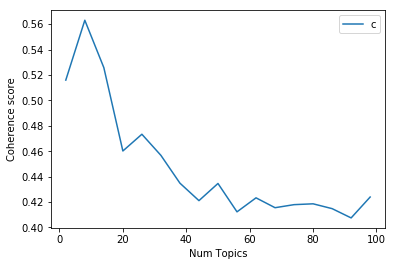

In [126]:
# Show graph
import matplotlib.pyplot as plt

limit=100; start=2; step=6;
x = range(start, limit, step)

plt.plot(x, coherence_values)
   
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [102]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.516
Num Topics = 8  has Coherence Value of 0.5631
Num Topics = 14  has Coherence Value of 0.5258
Num Topics = 20  has Coherence Value of 0.4602
Num Topics = 26  has Coherence Value of 0.4734
Num Topics = 32  has Coherence Value of 0.4567
Num Topics = 38  has Coherence Value of 0.4349
Num Topics = 44  has Coherence Value of 0.4211
Num Topics = 50  has Coherence Value of 0.4346
Num Topics = 56  has Coherence Value of 0.4123
Num Topics = 62  has Coherence Value of 0.4233
Num Topics = 68  has Coherence Value of 0.4156
Num Topics = 74  has Coherence Value of 0.418
Num Topics = 80  has Coherence Value of 0.4186
Num Topics = 86  has Coherence Value of 0.4148
Num Topics = 92  has Coherence Value of 0.4075
Num Topics = 98  has Coherence Value of 0.424


문서 갯수를 8로 선택합니다,

In [113]:
# pyLDAvis Visualization

%%time pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      14.127467        1       1 -0.282419  0.058830
11     11.733620        1       2 -0.158345  0.225286
17      7.017774        1       3 -0.230719 -0.103425
9       6.023109        1       4 -0.013011  0.235926
7       5.375692        1       5 -0.111452  0.061750
0       5.027695        1       6 -0.003212 -0.036526
13      4.888505        1       7  0.062982  0.180988
10      4.094919        1       8 -0.109154 -0.160153
3       4.016472        1       9  0.047321  0.140629
4       3.671430        1      10  0.152472 -0.058757
1       3.648389        1      11 -0.079834 -0.136873
12      3.648140        1      12  0.130063 -0.037001
19      3.624853        1      13 -0.085592 -0.146473
15      3.488162        1      14  0.047701  0.002404
6       3.356494        1      15  0.123851  0.121279
14      3.307501        1      16  0.145417 -0.097686
16      3.304329        1      17  0.145528 -0.082725
5       3.291240        1      18 -0.049970 -0.154341
8       3.194906        1      19  0.158067 -0.044451
18      3.159304        1      20  0.110305  0.031320, topic_info=      Category          Freq Term         Total  loglift  logprob
term                                                             
28925  Default  17617.000000  히오스  17617.000000  30.0000  30.0000
17487  Default   7393.000000   스킨   7393.000000  29.0000  29.0000
22412  Default  11504.000000   영웅  11504.000000  28.0000  28.0000
38076  Default   5842.000000   이거   5842.000000  27.0000  27.0000
8439   Default  10702.000000   사람  10702.000000  26.0000  26.0000
30295  Default  12243.000000   게임  12243.000000  25.0000  25.0000
25818  Default   4032.000000   노바   4032.000000  24.0000  24.0000
298    Default   4196.000000   지원   4196.000000  23.0000  23.0000
3592   Default   5113.000000   시간   5113.000000  22.0000  22.0000
7412   Default   3396.000000  제이나   3396.000000  21.0000  21.0000
7021   Default   3836.000000  가로쉬   3836.000000  20.0000  20.0000
22662  Default   3989.000000   딜러   3989.000000  19.0000  19.0000
3815   Default   4076.000000   겐지   4076.000000  18.0000  18.0000
35980  Default   5913.000000   특성   5913.000000  17.0000  17.0000
20861  Default   4192.000000   아나   4192.000000  16.0000  16.0000
4638   Default   2976.000000   모랄   2976.000000  15.0000  15.0000
26161  Default   4844.000000   조합   4844.000000  14.0000  14.0000
21636  Default   2697.000000   시공   2697.000000  13.0000  13.0000
34527  Default   6399.000000   영리   6399.000000  12.0000  12.0000
11729  Default   3106.000000  레오릭   3106.000000  11.0000  11.0000
22092  Default   2910.000000   힐러   2910.000000  10.0000  10.0000
532    Default   3375.000000  바리안   3375.000000   9.0000   9.0000
29392  Default   2417.000000   건가   2417.000000   8.0000   8.0000
13146  Default   2732.000000   탱커   2732.000000   7.0000   7.0000
18399  Default   2285.000000   친구   2285.000000   6.0000   6.0000
23978  Default   3658.000000  레이너   3658.000000   5.0000   5.0000
10257  Default   2183.000000   리밍   2183.000000   4.0000   4.0000
22212  Default   5269.000000   스킬   5269.000000   3.0000   3.0000
8097   Default   2759.000000  크로미   2759.000000   2.0000   2.0000
33224  Default   4151.000000   라인   4151.000000   1.0000   1.0000
...        ...           ...  ...           ...      ...      ...
40110  Topic20    388.858958   얼음    389.859903   3.4522  -4.7975
32803  Topic20    330.746311   불분    331.747257   3.4518  -4.9593
15022  Topic20    327.102721   장인    328.103666   3.4518  -4.9704
21260  Topic20    322.335819   취향    323.336765   3.4517  -4.9851
17274  Topic20    312.757576   블랙    313.758522   3.4516  -5.0153
20865  Topic20    306.695751   겐트    307.696697   3.4516  -5.0348
26444  Topic20    301.739967   전부    302.740913   3.4515  -5.0511
35220  Topic20    298.333000   도끼    299.333945   3.4515  -5.0625
39229  Topic20    279.377404   가시    280.378350   3.4512  -5.12

In [123]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10b))

df_ts = df_all["contents_all"].values.tolist()

[(0,
  '0.040*"노바" + 0.020*"디바" + 0.015*"렉사르" + 0.013*"발리라" + 0.013*"은신" + '
  '0.008*"티란데" + 0.008*"제라툴" + 0.006*"저격" + 0.006*"공포" + 0.006*"스카"'),
 (1,
  '0.022*"영리" + 0.017*"영웅" + 0.015*"히오스" + 0.013*"조합" + 0.013*"생각" + '
  '0.012*"게임" + 0.012*"지원" + 0.011*"시즌" + 0.011*"배치" + 0.011*"정도"'),
 (2,
  '0.080*"스킨" + 0.019*"상자" + 0.015*"전설" + 0.012*"파편" + 0.011*"탈것" + 0.011*"하나" '
  '+ 0.011*"이번" + 0.007*"대사" + 0.007*"군대" + 0.006*"난투"'),
 (3,
  '0.016*"레이너" + 0.013*"영웅" + 0.013*"가로쉬" + 0.011*"딜러" + 0.011*"겐지" + '
  '0.010*"상대" + 0.010*"바리안" + 0.010*"레오릭" + 0.009*"생각" + 0.009*"라인"'),
 (4,
  '0.021*"시공" + 0.016*"히오스" + 0.014*"인벤" + 0.013*"스타" + 0.012*"방송" + '
  '0.011*"영웅" + 0.008*"영상" + 0.008*"와우" + 0.008*"선수" + 0.007*"내용"'),
 (5,
  '0.029*"특성" + 0.020*"스킬" + 0.018*"모랄" + 0.014*"증가" + 0.012*"평타" + '
  '0.011*"사거리" + 0.011*"시간" + 0.010*"기본" + 0.010*"가능" + 0.009*"사용"'),
 (6,
  '0.026*"리리" + 0.020*"경기" + 0.016*"우리" + 0.012*"한국" + 0.011*"보이스" + '
  '0.010*"호드" + 0.009*"나라" + 0.009*"할로윈" + 0.007*

### 각 문장에서의 지배적인 토픽 찾기

In [125]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=df_ts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df_ts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7350,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",아바투르 유저인데 하나 건의합니다아바투르 유저인데 하나 건의합니다새로 생긴 하나무라...
1,1,1.0,0.6374,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",매칭 시스템 아무리 생각해도 문제가 많습니다매칭좀 제대로 해주세요9연패가 말이 되는...
2,2,7.0,0.4775,"게임, 히오스, 사람, 생각, 친구, 새끼, 시간, 문제, 자기, 유저",ㅈ같은 매칭좀 어캐좀 해봐요왜 내가 잘해도 ㅈ같이못하는 새키들때문에 게임을 져야하죠...
3,3,5.0,0.5209,"특성, 스킬, 모랄, 증가, 평타, 사거리, 시간, 기본, 가능, 사용",아나 스킨관련신 스킨 살무사 아나 수면총 색 고정말고 스킨 색 대로 해주셧으면 ...
4,4,1.0,0.5041,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",5인팟 승률50집착매칭 밸런스 파괴 빠대무간지옥승률 50 만든다고 조합 내놓고...
5,5,1.0,0.3658,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",영웅리그 매칭에서 대만인들대만인 새끼들좀 매칭 안되게 해라말도 안통하는 머저리 새끼...
6,6,1.0,0.3764,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",신영웅 그만만들고 기존영웅 손좀보시죠신영웅 이제 그만좀만드시고요 기존영웅 쓸수나있게...
7,7,3.0,0.3922,"레이너, 영웅, 가로쉬, 딜러, 겐지, 상대, 바리안, 레오릭, 생각, 라인",망한맵들은 리메이크가 답이 아니다 삭제가 답이지 죽광도 리메이크해도 망맵 하나무라도...
8,8,1.0,0.8396,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",히오스 영웅리그 개선안HOTS는 이전부터 영웅리그에 대한 문제가 많았습니다크게 정리...
9,9,1.0,0.6565,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",다른 영웅 선택되는 버그분명 픽창에서는 제가 하고싶은 영웅을 선택했는데 시작하고나면...


### 각 토픽별로 가장 대표적인 문서 찾기

In [130]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                      grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                      axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9270,"노바, 디바, 렉사르, 발리라, 은신, 티란데, 제라툴, 저격, 공포, 스카",사무로 은신 or 분신 너프사무로 은신 or 분신 너프에 관하여인간적으로 둘 중에 ...
1,1.0,0.9880,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",히린이들은 영웅리그에서 기존유저는 빠대에서많이본다게임을 많이하고 잘아는사람들은 빠른...
2,2.0,0.9775,"스킨, 상자, 전설, 파편, 탈것, 하나, 이번, 대사, 군대, 난투",홍코노랑 오프라임 뭐지왜 커플룩설마음모음모음모음모음모음모음모음모음모음모음모음모음모음...
3,3.0,0.9825,"레이너, 영웅, 가로쉬, 딜러, 겐지, 상대, 바리안, 레오릭, 생각, 라인",난투브락시스 탈출영웅성공한 조합바리안소냐레가르모랄레스그레이메인바리안자리야루시우레가르...
4,4.0,0.9998,"시공, 히오스, 인벤, 스타, 방송, 영웅, 영상, 와우, 선수, 내용",히오스 하고 싶다아시공조아시공조아시공조아시공조아시공조아시공조아시공조아시공조아시공조아...
5,5.0,0.9792,"특성, 스킬, 모랄, 증가, 평타, 사거리, 시간, 기본, 가능, 사용",아나 개인적으로 아쉬운 부분이아나는 자신 스스로 회복 가능한 생존기가 그나마 생체 ...
6,6.0,0.9859,"리리, 경기, 우리, 한국, 보이스, 호드, 나라, 할로윈, 오픈, 레이븐",리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리리...
7,7.0,0.9852,"게임, 히오스, 사람, 생각, 친구, 새끼, 시간, 문제, 자기, 유저",이게 게임이냐렉 오짐 망겜 히오스 망겜 히오스 망겜 히오스 망겜 히오스 망겜 히오스...


### 문서 전체의 토픽 분포

In [136]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(10)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,1.0,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",12785.0,0.0834
1,1.0,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",25748.0,0.1681
2,7.0,"게임, 히오스, 사람, 생각, 친구, 새끼, 시간, 문제, 자기, 유저",12491.0,0.0815
3,5.0,"특성, 스킬, 모랄, 증가, 평타, 사거리, 시간, 기본, 가능, 사용",35004.0,0.2285
4,1.0,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",19759.0,0.1290
5,1.0,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",14994.0,0.0979
6,1.0,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",9430.0,0.0616
7,3.0,"레이너, 영웅, 가로쉬, 딜러, 겐지, 상대, 바리안, 레오릭, 생각, 라인",22997.0,0.1501
8,1.0,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",NaN,NaN
9,1.0,"영리, 영웅, 히오스, 조합, 생각, 게임, 지원, 시즌, 배치, 정도",NaN,NaN
